In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Fit a linear regression model
model = LinearRegression().fit(X, y)

# Make predictions
y_pred = model.predict(X)

# We'll use this data to calculate our metrics

In [2]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse = calculate_mse(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Using sklearn
mse_sklearn = mean_squared_error(y, y_pred)
print(f"MSE (sklearn): {mse_sklearn:.4f}")

Mean Squared Error: 0.4800
MSE (sklearn): 0.4800


In [3]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(calculate_mse(y_true, y_pred))

rmse = calculate_rmse(y, y_pred)
print(f"Root Mean Squared Error: {rmse:.4f}")

# Using sklearn
rmse_sklearn = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE (sklearn): {rmse_sklearn:.4f}")

Root Mean Squared Error: 0.6928
RMSE (sklearn): 0.6928


In [4]:
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

r2 = calculate_r2(y, y_pred)
print(f"R-squared: {r2:.4f}")

# Using sklearn
r2_sklearn = r2_score(y, y_pred)
print(f"R-squared (sklearn): {r2_sklearn:.4f}")

R-squared: 0.6000
R-squared (sklearn): 0.6000


In [5]:
def calculate_adjusted_r2(y_true, y_pred, n_features):
    r2 = calculate_r2(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

adj_r2 = calculate_adjusted_r2(y, y_pred, X.shape[1])
print(f"Adjusted R-squared: {adj_r2:.4f}")

Adjusted R-squared: 0.4667


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = calculate_adjusted_r2(y_test, y_pred, X.shape[1])

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

MSE: 0.5559
RMSE: 0.7456
R-squared: 0.5758
Adjusted R-squared: 0.5750


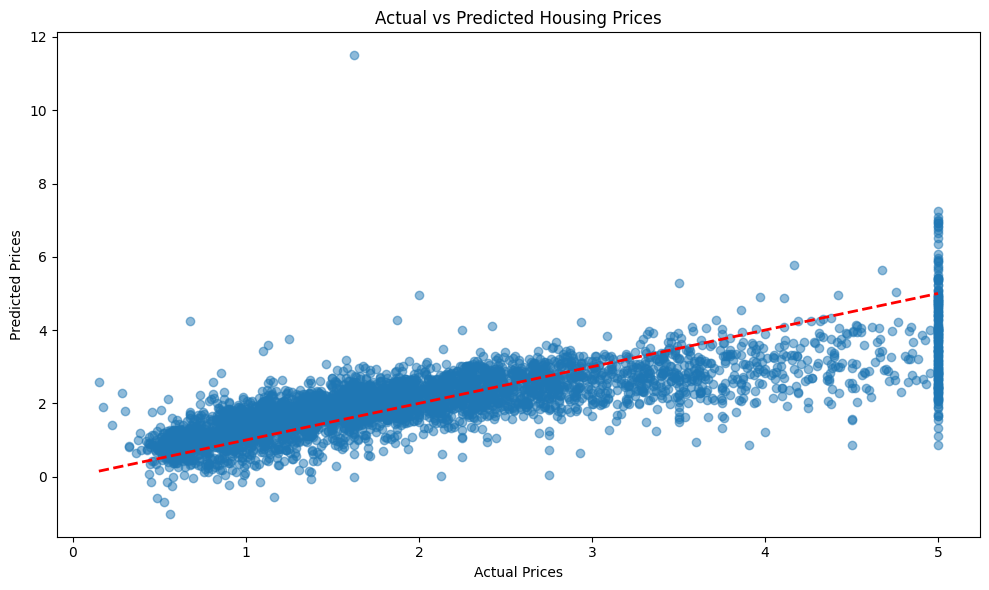

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae = calculate_mae(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Using sklearn
mae_sklearn = mean_absolute_error(y_test, y_pred)
print(f"MAE (sklearn): {mae_sklearn:.4f}")

Mean Absolute Error: 0.5332
MAE (sklearn): 0.5332
